## Learning Neural Interactions 

In [58]:
import csv
import numpy as np

### Reading CSV file

In [59]:
with open('./data/multineuron_spike_train_4000.csv', 'r') as f:
    data = csv.reader(f, delimiter=',') 
    lines = [line for line in data]
    header = lines[0]
    lines = lines[1:]

In [12]:
header, len(lines)

(['arrival time',
  ' event type',
  ' event id',
  ' label',
  ' parent arrival time',
  ' nof offsprings',
  ' offsprings <type>',
  'offsprings <id>'],
 3978)

In [61]:
nodes = sorted(set([int(line[1]) for line in lines]))
spike_trains = []

for node in sorted(nodes):
    node_spikes = []
    for line in lines:
        if line[1] == str(node):
            node_spikes.append(float(line[0]))
    
    
    spike_trains.append(np.array(node_spikes))

In [62]:
## Sanity check 
len(spike_trains) ==  len(nodes)

True

## Learning 

In [65]:
from tick.dataset import fetch_hawkes_bund_data
from tick.hawkes import HawkesConditionalLaw
from tick.plot import plot_hawkes_kernel_norms


## Initialize model 
hawkes_learner = HawkesConditionalLaw(
    claw_method="log", delta_lag=0.1, min_lag=5e-4, max_lag=500,
    quad_method="log", n_quad=10, min_support=1e-4, max_support=1, n_threads=4)

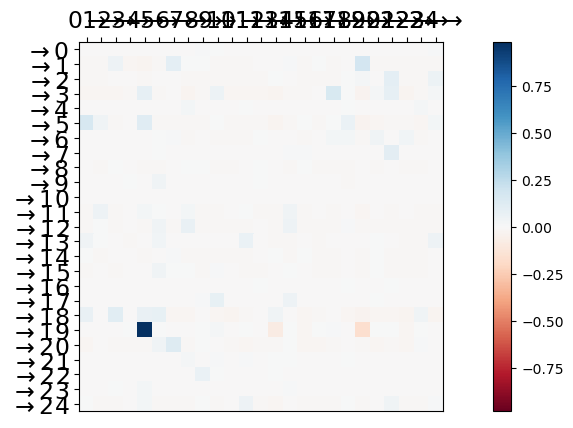

In [66]:
hawkes_learner.fit(spike_trains)
adjacency_plot = plot_hawkes_kernel_norms(hawkes_learner,
                         node_names=[str(n) for n in nodes])

In [67]:
hawkes_learner??